## **Libraries imported**

In [57]:
# from google.colab import files
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn_pandas import CategoricalImputer
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.mixture import GaussianMixture
from sklearn.neural_network import MLPClassifier
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams

In [5]:
train = pd.read_csv('train.psv', delimiter = '|')
train.shape

(1170952, 41)

In [6]:
train.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel'],
      dtype='object')

In [7]:
# Count of Sepsis
train['SepsisLabel'].value_counts()

0    1148526
1      22426
Name: SepsisLabel, dtype: int64

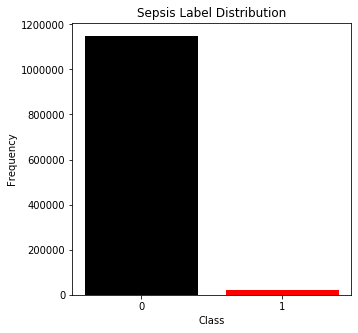

In [8]:
rcParams['figure.figsize'] = 5, 5

plt.bar(train['SepsisLabel'].value_counts().index,
        train['SepsisLabel'].value_counts(), color=['black', 'red'])
plt.xticks([0,1])
plt.xlabel('Class')
plt.title('Sepsis Label Distribution')
_ = plt.ylabel('Frequency')

In [58]:
# Null Values
train.isnull().sum()

HR                   107328
O2Sat                148890
Temp                 774085
SBP                  173214
MAP                  136981
DBP                  433407
Resp                 157622
EtCO2               1141946
BaseExcess          1087773
HCO3                1106693
FiO2                1050036
pH                  1071768
PaCO2               1093087
SaO2                1124581
AST                 1152501
BUN                 1085498
Alkalinephos        1152757
Calcium             1105506
Chloride            1102844
Creatinine          1097483
Bilirubin_direct    1168871
Glucose              989214
Lactate             1136509
Magnesium           1091125
Phosphate           1119704
Potassium           1055780
Bilirubin_total     1154574
TroponinI           1163178
Hct                 1055984
Hgb                 1078975
PTT                 1129073
WBC                 1091781
Fibrinogen          1162861
Platelets           1099316
Age                       0
Gender              

In [59]:
missing = (train.isnull().sum() / train.shape[0]) * 100
missing

HR                   9.165875
O2Sat               12.715295
Temp                66.107321
SBP                 14.792579
MAP                 11.698259
DBP                 37.013217
Resp                13.461013
EtCO2               97.522870
BaseExcess          92.896464
HCO3                94.512243
FiO2                89.673701
pH                  91.529627
PaCO2               93.350283
SaO2                96.039889
AST                 98.424274
BUN                 92.702177
Alkalinephos        98.446136
Calcium             94.410873
Chloride            94.183536
Creatinine          93.725704
Bilirubin_direct    99.822281
Glucose             84.479466
Lactate             97.058547
Magnesium           93.182727
Phosphate           95.623390
Potassium           90.164242
Bilirubin_total     98.601309
TroponinI           99.336096
Hct                 90.181664
Hgb                 92.145109
PTT                 96.423508
WBC                 93.238749
Fibrinogen          99.309024
Platelets 

Text(0.5, 1.0, 'Missing Data Percentage')

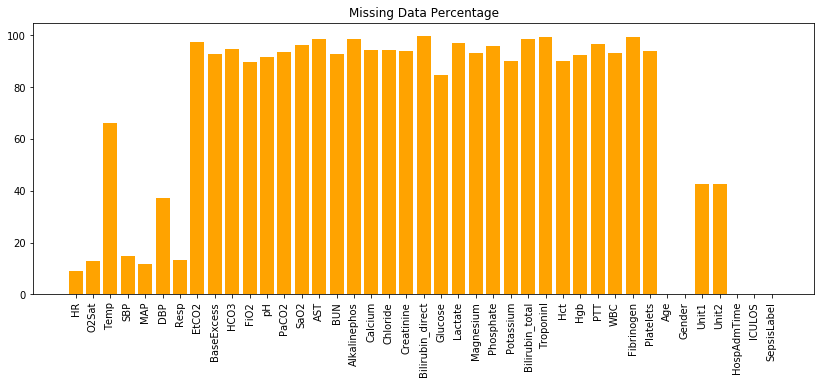

In [60]:
rcParams['figure.figsize'] = 14, 5
_ = plt.bar(missing.index, missing, color=(1.0,0.64,0,1))
_ = plt.xticks(missing.index, rotation=90)

plt.title("Missing Data Percentage")


In [61]:
# Filter out values which have too many NaN values
cols = list(missing[missing < 90].index)
cols

['HR',
 'O2Sat',
 'Temp',
 'SBP',
 'MAP',
 'DBP',
 'Resp',
 'FiO2',
 'Glucose',
 'Age',
 'Gender',
 'Unit1',
 'Unit2',
 'HospAdmTime',
 'ICULOS',
 'SepsisLabel']

In [62]:
train = train[selected_cols]
train.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,FiO2,Glucose,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.16,0,NaN,NaN,-135.03,1,0
1,123.5,98.0,NaN,113.5,81.0,65.0,20.0,NaN,NaN,83.16,0,NaN,NaN,-135.03,2,0
2,117.5,99.0,NaN,93.0,69.0,55.0,17.5,NaN,NaN,83.16,0,NaN,NaN,-135.03,3,0
3,116.0,94.0,NaN,91.0,64.0,55.0,14.0,NaN,NaN,83.16,0,NaN,NaN,-135.03,4,0
4,113.0,97.0,NaN,89.0,66.0,53.0,15.0,NaN,76.0,83.16,0,NaN,NaN,-135.03,5,0


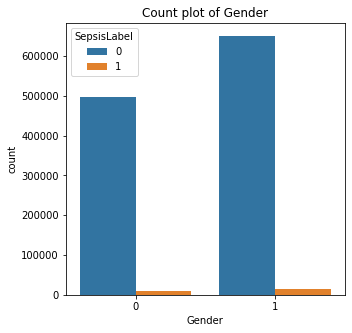

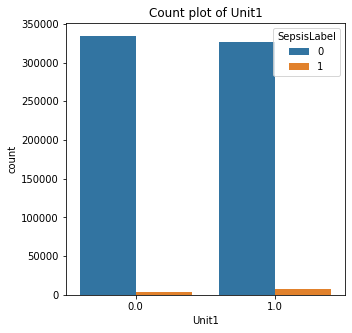

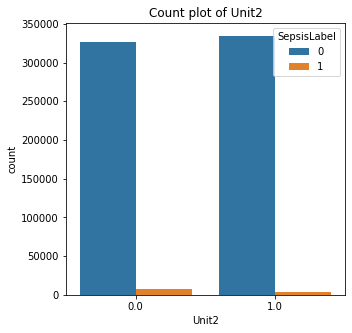

In [17]:
for i,var in enumerate(cat_vars):
    plt.figure(i)
    plt.title("Count plot of " + str(var))
    sns.countplot(filter_train[var].dropna(), hue='SepsisLabel', data= filter_train);

In [64]:
features = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp','FiO2','Glucose','Age','HospAdmTime','ICULOS','Gender','Unit1','Unit2']

In [20]:
X_train = filter_train[features]
y_train = filter_train['SepsisLabel']

In [21]:
categorical = X_train.dtypes == object
categorical['Unit1'] = True
categorical['Unit2'] = True
categorical['Gender'] = True

In [22]:
cont_scale_pipeline = make_pipeline(SimpleImputer(strategy = "median"), 
                                    StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy = "constant", 
                                           fill_value = 999), 
                             OneHotEncoder(handle_unknown="ignore"))
preprocess_trans_scale = make_column_transformer((cont_scale_pipeline, 
                                                  ~categorical), 
                                                 (cat_pipeline, categorical))

In [23]:
logistic_pipe_scale = make_pipeline(preprocess_trans_scale, 
                                    LogisticRegression(solver='lbfgs') )
rf_pipe_scale = make_pipeline(preprocess_trans_scale, RandomForestClassifier())
svc_pipe_scale = make_pipeline(preprocess_trans_scale, SVC())
gb_pipe_scale = make_pipeline(preprocess_trans_scale, GradientBoostingClassifier())
dt_pipe_scale = make_pipeline(preprocess_trans_scale, DecisionTreeClassifier() )
gmm_pipe_scale = make_pipeline(preprocess_trans_scale, GaussianMixture(n_components=2))
mlp_pipe_scale = make_pipeline(preprocess_trans_scale, MLPClassifier() )


In [24]:
scores_logistic_pipe_scale = cross_validate(logistic_pipe_scale, X_train, 
                                             y_train, 
                                             cv=StratifiedKFold(3, shuffle=True)
                                             ,scoring=["average_precision", 
                                                       "roc_auc", "precision", 
                                                       "recall"])



scores_rf_pipe_scale = cross_validate(rf_pipe_scale, X_train, 
                                             y_train, 
                                             cv=StratifiedKFold(3, shuffle=True)
                                             ,scoring=["average_precision", 
                                                       "roc_auc", "precision", 
                                                       "recall"])



scores_gb_pipe_scale = cross_validate(gb_pipe_scale, X_train, 
                                             y_train, 
                                             cv=StratifiedKFold(3, shuffle=True)
                                             ,scoring=["average_precision", 
                                                       "roc_auc", "precision", 
                                                       "recall"])



scores_dt_pipe_scale = cross_validate(dt_pipe_scale, X_train, 
                                             y_train, 
                                             cv=StratifiedKFold(3, shuffle=True)
                                             ,scoring=["average_precision", 
                                                       "roc_auc", "precision", 
                                                       "recall"])


scores_gmm_pipe_scale = cross_validate(gmm_pipe_scale, X_train, 
                                             y_train, 
                                             cv=StratifiedKFold(3, shuffle=True)
                                             ,scoring=["average_precision", 
                                                       "roc_auc", "precision", 
                                                       "recall"])

scores_mlp_pipe_scale = cross_validate(mlp_pipe_scale, X_train, 
                                             y_train, 
                                             cv=StratifiedKFold(3, shuffle=True)
                                             ,scoring=["average_precision", 
                                                       "roc_auc", "precision", 
                                                       "recall"])

In [25]:
log_df = pd.DataFrame(scores_logistic_pipe_scale)
log_df['model'] = 'LogisticRegression'

dt_df = pd.DataFrame(scores_dt_pipe_scale)
dt_df['model'] = 'DecisionTree'

gb_df = pd.DataFrame(scores_gb_pipe_scale)
gb_df['model'] = 'GradientBoosting'

rf_df = pd.DataFrame(scores_rf_pipe_scale)
rf_df['model'] = 'RandomForest'

gmm_df = pd.DataFrame(scores_gmm_pipe_scale)
gmm_df['model'] = 'GMM'

mlp_df = pd.DataFrame(scores_mlp_pipe_scale)
mlp_df['model'] = 'MLP'




results = pd.concat([log_df, dt_df, gb_df, rf_df, gmm_df, mlp_df])

In [27]:
results

,fit_time,score_time,test_average_precision,test_roc_auc,test_precision,test_recall,model
0,5.697273,1.103642,0.075483,0.734359,0.265060,0.002943,LogisticRegression
1,5.986226,1.125372,0.069325,0.721783,0.109244,0.001739,LogisticRegression
2,4.611776,0.993752,0.073069,0.729195,0.215909,0.002542,LogisticRegression
0,13.165433,1.092246,0.111703,0.659724,0.295361,0.334671,DecisionTree
1,12.347889,1.081132,0.127103,0.671164,0.321489,0.357057,DecisionTree
2,12.392362,1.065242,0.128750,0.673370,0.322242,0.361472,DecisionTree
0,189.676066,1.881074,0.116495,0.790190,0.603774,0.004280,GradientBoosting
1,189.268535,1.855778,0.106670,0.785284,0.513514,0.005084,GradientBoosting
2,192.566688,1.997134,0.115179,0.793729,0.540230,0.006288,GradientBoosting
0,145.752567,19.231705,0.503132,0.944831,0.902439,0.074238,RandomForest


In [49]:
import pickle
from sklearn.externals import joblib
filename = "model.pkl"
joblib.dump(rf_pipe_scale,filename)

['model.pkl']

In [41]:
import pickle

In [52]:
modell = joblib.load(filename)